# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

## Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

0 1
d0 ->
-368.21287905686853
d1 ->
-38975.85389978482
79200.90980656787 72760.82540215882
--------
18.410643952843426 1949.7926949892412
d0 ->
186613.36865360846
d1 ->
19250816.15738673
18721740667.902885 17067574573.291124
--------
-9312.257788727578 -960591.0151743473
d0 ->
-92167143.95640965
d1 ->
-9508317921.611403
4567255000462284.0 4163752835270910.0
--------
4599044.940031755 474455305.06539583
d0 ->
45522983407.24501
d1 ->
4696326043760.3
1.114203072417515e+21 1.0157668265484407e+21
--------
-2271550125.4222193 -234341846882.94962
d0 ->
-22484604983894.945
d1 ->
-2319598323418007.5
2.7181501502754746e+26 2.4780103561666225e+26
--------
1121958699069.3252 115745574324017.42
d0 ->
1.1105543256024816e+16
d1 ->
1.1456905529700835e+18
6.631053550599084e+31 6.045221368294753e+31
--------
-554155204102171.5 -5.716878207418016e+16
d0 ->
-5.485223827580505e+18
d1 ->
-5.658767856111935e+20
1.6176763151386806e+37 1.47475983305506e+37
--------
2.737070361749231e+17 2.8236670498485498e+19


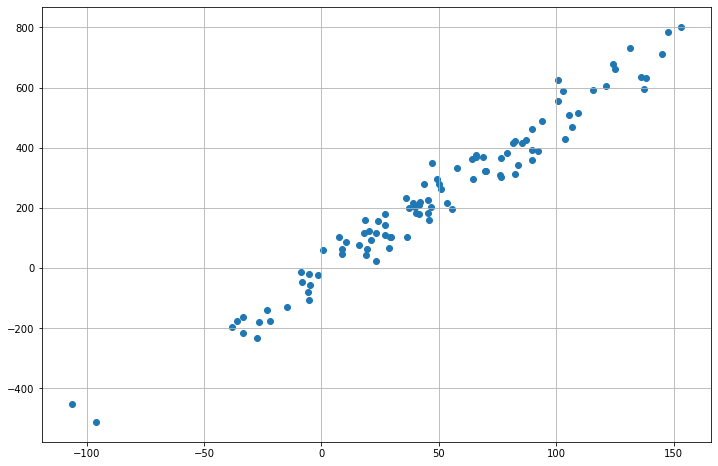

In [28]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(X, y)
ax.grid(True)

def hipotesis (theta0,tetha1,X):
    return theta0 + theta1 * X

def Jota(theta0,theta1,X):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (1/m) * np.sum((prediccion - y)**2)

def derivada0 (X,theta0,theta1):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (2/m) * np.sum(prediccion - y)

def derivada1 (X,theta0,theta1):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (2/m) * np.sum((prediccion - y)*X)

    
theta0 = 0
theta1 = 1
epsilon = 0.01 
alpha = 0.05
for i in range(10):
    print (theta0,theta1)
    coste = Jota(theta0,theta1,X)
    d0 = derivada0(X,theta0,theta1)
    print ("d0 ->")
    print (d0)
    d1 = derivada1(X,theta0,theta1)
    print ("d1 ->")
    print (d1)
    theta0_next = theta0 - (alpha * d0)
    theta1_next = theta1 - (alpha * d1)
    coste1 = Jota(theta0_next,theta1_next,X)
    theta0=theta0_next
    theta1=theta1_next
    print (coste,coste1)
    print ("--------")
